<a href="https://colab.research.google.com/github/fabriciosantana/nlp/blob/main/AKCIT_NLP_M9_Colab_Unidade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo do Colab

Neste colab, exploraremos como os modelos de LLM podem ser aplicados em problemas comerciais, abrangendo plataformas como OpenAI, Gemini da Google, e a Together. Vamos aprender a obter as API keys dessas ferramentas, entender a configuração de parâmetros como a temperatura e ver exemplos práticos de uso. A partir disso, discutiremos como esses modelos podem ser integrados a serviços comerciais, com um enfoque em como resolver desafios reais do comércio, ajudando empresas a otimizar processos e oferecer soluções inovadoras.

# Google Gemini

O Gemini, da Google, é uma plataforma de inteligência artificial avançada que oferece modelos altamente eficientes para análise e processamento de informações. Ele tem uma grande vantagem de estar totalmente integrado com as ferramentas da da nuvem do Google, Google Cloud Platform.

## Preço da API do Google Gemini

Atualmente (em 2024), **o Google possui uma possibilidade de acesso gratuito** a API do Gemini com algumas limitações de acesso. Por exemplo, para o modelo Gemini 1.5 Flash temos os seguintes limites:

1. 15 RPM (requisições por minuto)
2. 1 milhão TPM (tokens por minuto)
3. 1,500 RPD (requisições por dia)

Você pode encontrar mais detalhes na [página do Google](https://ai.google.dev/pricing).



<h3>Como Obter a Chave da Google Cloud e Instanciar o Modelo Gemini</h3>

Este guia apresenta um passo a passo minimalista para obter a chave de API da Google Cloud e instanciar o modelo Gemini.

<h4>1. Acessar o AI Studio da Google</h4>

- Acesse o [Google AI Studio](https://makersuite.google.com/app/apikey?hl=pt-br).
- Clique em **"Criar chave de API"**

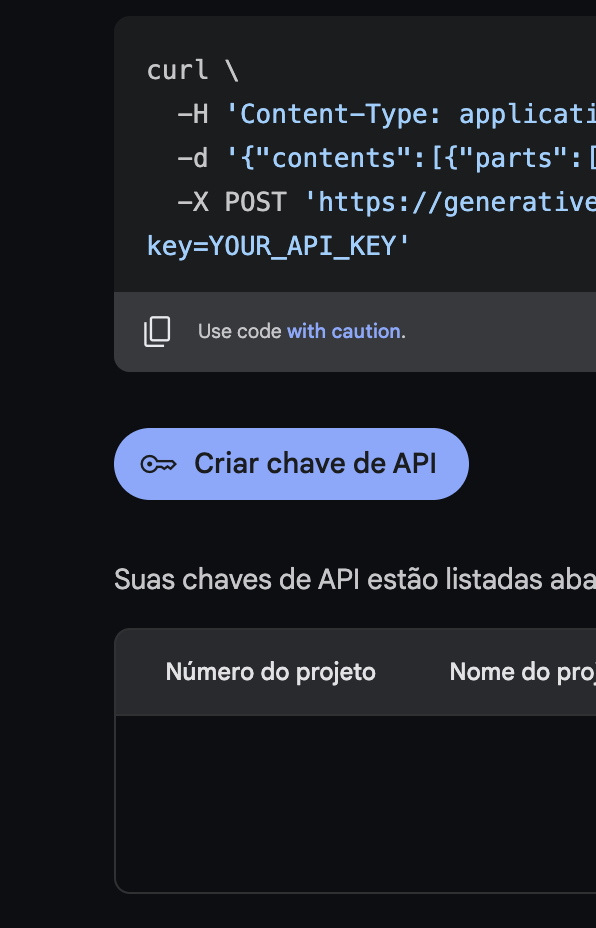

<h4>2. Crie a chave a partir de um novo projeto</h4>

- Aceite os termos de uso.

<h4> 3. Copie a chave de API</h4>

<h4>Agora vamos instanciar nosso modelo</h4>


In [ ]:
!pip install -q -U google-generativeai==0.8.3

O código abaixo importa userdata do Google Colab para manipular dados do usuário no ambiente Colab.

In [ ]:
from google.colab import userdata
import os

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')  # Define a variável de ambiente GOOGLE_API_KEY com a chave de API do Google, recuperada do Colab.

In [ ]:
import google.generativeai as genai

# Configura a chave do Gemini - Substitua pela sua chave
genai.configure(api_key=GOOGLE_API_KEY)

# Define o modelo do Gemini
model = genai.GenerativeModel('gemini-1.5-flash')

# Configuração da API da LLM
generation_config = genai.GenerationConfig(
        max_output_tokens=1000,
        temperature=0.2,
)

# Pergunta do cliente ao chatbot
consulta_usuario = "Meu computador não liga, o que posso fazer?"

# Envio da pergunta e impressão da resposta
resposta = model.generate_content(
    f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}",
    generation_config = generation_config
)
print(resposta.text)

Verifique a fonte de alimentação, os cabos, o botão liga/desliga e a tomada.  Se nada funcionar, procure um técnico.



## Alterando o código para Langchain

Vamos mudar o código para invocar a API do Google utilizando a biblioteca Langchain. Então, ao invés de usar diretamente a biblioteca do Google, iremos usar a biblioteca `langchain-google-genai` que facilita a interação com a API do Google.

In [ ]:
!pip install -q -U langchain==0.3.7 langchain-google-genai==2.0.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.7 MB/s eta 0:00:00


O código abaixo realiza a mesma operação do código utilizando a biblioteca com a classe genai.GenerativeModel. Mas, perceba que o número de linhas de código é menor:

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

consulta_usuario = "Meu computador não liga, o que posso fazer?"
result = llm.invoke(f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}")

print(result.content)

Verifique a tomada, o cabo de força e o interruptor do computador.  Se nada funcionar, verifique fusíveis ou disjuntores. Se ainda assim não ligar, pode haver um problema interno e necessitará de reparo profissional.



### Nesse caso, que tal alterarmos o max_tokens?
Vamos entender como ele pode te ajudar na hora de limitar uma saída. Mesmo prompt do código anterior, mas com um limite de 10 tokens.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.7, max_tokens=10)

consulta_usuario = "Meu computador não liga, o que posso fazer?"
result = llm.invoke(f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}")

print(result.content)

Verifique a tomada, o cabo de força e


### A resposta fica estranha, né?

Parece que não faz muito sentido utilizar esse parâmetro, né...?
Porém, imagine que você precisa usar um LLM para ler uma pergunta de um usuário e você SÓ pode responder com **SIM** ou com **NÃO**.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.7, max_tokens=1)

consulta_usuario = "Olá, bom dia. Vocês tem acesso ao meu banco de dados que é privado? Me responda explicando o porque você não tem"

result = llm.invoke(f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}")

print(result.content)

Não


## Exercício 1

Neste exercício, você aprenderá a utilizar uma API para acessar o Gemini utilizando Langchain e adaptar o código para diferentes finalidades. Você está aprendendo a usar a API `langchain_google_genai` para acessar o LLM Gemini. O código fornecido abaixo demonstra como enviar uma consulta simples sobre um problema de computador e receber uma resposta.

**Objetivo:**

Este exercício visa familiarizar você com o uso de APIs para interagir com LLMs, especificamente com o Gemini, e a explorar o impacto dos parâmetros `temperature` e `max_tokens` na resposta gerada.

**Tarefa:**

1. **Modifique a consulta do usuário:** altere a variável `consulta_usuario` para solicitar os passos para fazer uma receita de bolo. Seja específico no tipo de bolo que você deseja (ex: "bolo de chocolate com cobertura de morango").

2. **Ajuste a temperatura:** experimente diferentes valores para o parâmetro `temperature` (ex: 0.5, 1.5, 2.0). Observe como a variação da temperatura afeta a criatividade e a aleatoriedade da resposta do LLM.

3. **Ajuste o número máximo de tokens:** modifique o parâmetro `max_tokens` (ex: 500, 1500, 2000). Analise como o limite de tokens influencia o comprimento e a completude da resposta gerada.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=1.0, max_tokens=1000)

consulta_usuario = "Meu computador não liga, o que posso fazer?"
result = llm.invoke(f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}")

print(result.content)

Verifique a tomada, o cabo de força e o interruptor do computador.  Se o problema persistir, verifique as luzes indicadoras de energia e tente conectar outro dispositivo na tomada para testar a energia. Se nada funcionar, procure ajuda profissional.



In [ ]:
# <coloque seu novo código aqui>

# OpenAI

A OpenAI oferece modelos poderosos como o GPT, que podem ser usados para diversas tarefas comerciais, como atendimento ao cliente, criação de conteúdo, automação de processos e análise de dados. Esses modelos são capazes de entender e gerar texto de forma natural, permitindo que empresas otimizem suas interações com os clientes, criando experiências mais personalizadas e eficientes.

**API paga:** a OpenAI cobra pelo uso da API. As políticas da API mudam constantemente e, por isso, é importante validar se a API está disponível com créditos para novos usuários. **Gostaria de reforçar que não é preciso executar este trecho do Colab com a API da OpenAI, caso não tenha interesse em investir em pagar pela API (verifique os preços no [site da OpenAI](https://openai.com/api/pricing/)).** Entretanto, estamos deixando este código como referência para permitir o estudo de vocês com a API mais utilizada no mundo no campo de LLMs.

<h3>Como Obter a Chave da OpenAI e Instanciar Modelos LLMs</h3>

Este guia apresenta um passo a passo minimalista para obter a chave de API da OpenAI e instanciar modelos de linguagem.

<h4>1. Acessar a Conta OpenAI</h4>

- Faça login na sua conta OpenAI em [https://platform.openai.com/](https://platform.openai.com/).

<h4>2. Ir para Configurações</h4>

- No canto superior direito, clique no seu perfil e selecione "API Keys" ou vá diretamente para [https://platform.openai.com/account/api-keys](https://platform.openai.com/account/api-keys).

<h4>3. Gerar Nova Chave</h4>

- Clique em “+ Create new secret key” para gerar uma nova chave de API.
- **Importante**: Copie a chave gerada, pois não poderá visualizá-la novamente.

<h4>Agora vamos instanciar nosso modelo</h4>


Para isso, nós precisamos conectar no cliente da openai atavés de uma API (Interface de Programação de Aplicação), que nada mais é que uma forma de conectar serviços através da WEB.

In [ ]:
!pip install openai==1.57.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.5
    Uninstalling openai-1.54.5:
      Successfully uninstalled openai-1.54.5


A biblioteca da OpenAI faz esse serviço mais rapidamente para nós, ela antecipa alguns código que nós baixamos quando instalamos ela e nos permite com poucas linhas de código fazer aplicações robustas.

Nesse trecho de código estamos conectando na OpenAI, simulando uma consulta do usuário e mandando para o modelo da OpenAI na forma de uma mensagem de um "user".

In [ ]:
from google.colab import userdata
import os

OPENAI_KEY = userdata.get('OPENAI_KEY')
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_KEY')  # Define a variável de ambiente GOOGLE_API_KEY com a chave de API do Google, recuperada do Colab.

In [ ]:
import openai

#Configura o cliente da OpenAI
client = openai.OpenAI(api_key = OPENAI_KEY)

# Exemplo de uso para um assistente de saúde
consulta_usuario = "Meu computador não liga, o que posso fazer?"

# Faz a construção do código que irá chamar a api
resposta = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "user", "content": f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}"}
  ]
)

# Imprime a resposta
print("Resposta do Assistente:", resposta.choices[0].message.content)

Resposta do Assistente: Se o seu computador não liga, siga estas etapas para solucionar o problema:

1. **Verifique a fonte de energia**: Assegure-se de que o cabo de alimentação está conectado corretamente à tomada e ao computador.

2. **Testar a tomada**: Tente usar outra tomada ou um dispositivo diferente na mesma tomada para garantir que ela está funcionando.

3. **Verifique o botão de liga/desliga**: Às vezes, o botão pode estar com problemas. Pressione-o firmemente.

4. **Remova dispositivos externos**: Desconecte todos os dispositivos (mouse, teclado, impressora, etc.) e tente ligar o computador novamente.

5. **Observe sinais de vida**: Veja se as luzes do computador acendem ou se há barulhos (ventiladores, HD).

6. **Verifique RAM e cabos internos**: Se você se sentir confortável, abra o computador e verifique se a RAM está bem encaixada e se os cabos internos estão conectados corretamente.

7. **Teste com outra fonte de energia**: Se possível, tente usar outra fonte de energi

Nesta célula de código, estamos interagindo com um modelo de linguagem grande chamado GPT-4o-mini através da API do Google AI. Este código envia uma pergunta para o modelo GPT-4o-mini, configura alguns parâmetros que influenciam na geração da resposta e, por fim, exibe a resposta gerada pelo modelo.

**Passo a passo:**

1. **Inicialização da requisição:** `client.chat.completions.create(...)` inicia o processo de envio de uma requisição para a API.
2. **Definição do modelo:** `model="gpt-4o-mini"` especifica qual modelo de linguagem será utilizado para gerar a resposta.
3. **Envio da mensagem:** `messages=[{"role": "user", "content": f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}"}]` define a mensagem que será enviada ao modelo. A variável `consulta_usuario` deve conter a pergunta que queremos que o modelo responda.
4. **Parâmetros de controle:**
    * `temperature`: controla a "criatividade" da resposta. Valores mais altos resultam em respostas mais diversificadas e menos previsíveis.
    * `max_tokens`: limita o tamanho da resposta em número de tokens (palavras ou subpalavras).
    * `top_p`: define a probabilidade acumulada para a seleção de palavras durante a geração da resposta (nucleus sampling).

In [ ]:
resposta = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}"}
    ],
    temperature=0.7,  # Controla a aleatoriedade da resposta. Valores mais altos (até 1.0) tornam a resposta mais criativa; valores mais baixos (próximos a 0) tornam a resposta mais focada e conservadora.
    max_tokens=150,  # Limita o número máximo de tokens (palavras e partes de palavras) que a resposta pode ter. Isso ajuda a controlar o comprimento da resposta.
    top_p=1.0  # Usa a técnica de amostragem chamada nucleus sampling. Valores próximos a 1.0 significam que todas as palavras do vocabulário estão disponíveis para a amostragem, enquanto valores mais baixos restringem as opções.
)


# Imprime a resposta
print("Resposta do Assistente:", resposta.choices[0].message.content)

Resposta do Assistente: Se o seu computador não liga, siga estes passos:

1. **Verifique a fonte de energia**:
   - Certifique-se de que o cabo de alimentação está conectado corretamente na tomada e no computador.
   - Teste outra tomada ou use um outro cabo de alimentação, se disponível.

2. **Verifique indicadores de luz**:
   - Veja se há luzes acesas no computador (como a luz do botão de energia ou no painel frontal). Se não houver, pode ser um problema de energia.

3. **Desconecte periféricos**:
   - Remova todos os dispositivos externos (impressoras, pen drives, etc.) e tente ligar o computador novamente.

4. **Tente um reinício for


## Alterando para utilizar Langchain

Vamos mudar o código para invocar a API da OpenAI utilizando a biblioteca Langchain. Então, ao invés de usar diretamente a biblioteca da OpenAI, iremos usar a biblioteca `langchain-openai` que facilita a interação com a API da OpenAI.

In [ ]:
!pip install -q -U langchain-openai==0.2.11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00


In [ ]:
from langchain_openai import ChatOpenAI


llm = ChatOpenAI(model="gpt-4o-mini")

consulta_usuario = "Meu computador não liga, o que posso fazer?"
result = llm.invoke(f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}")

print(result.content)

Se o seu computador não liga, você pode seguir estas etapas para tentar diagnosticar o problema:

1. **Verifique a fonte de energia**:
   - Certifique-se de que o cabo de alimentação está corretamente conectado à tomada e ao computador.
   - Tente usar uma tomada diferente.

2. **Inspecione o botão de ligar**:
   - Verifique se o botão de ligar está funcionando corretamente. Às vezes, pode ficar preso ou danificado.

3. **Verifique a luz indicadora**:
   - Veja se alguma luz LED acende no computador. Isso pode indicar se está recebendo energia.

4. **Remova periféricos**:
   - Desconecte todos os dispositivos externos (impressoras, USB, etc.) e tente ligar o computador novamente.

5. **Teste com outra fonte de energia**:
   - Se possível, teste o computador com uma fonte de energia diferente ou utilize um multímetro para verificar se a fonte está funcionando.

6. **Verifique o hardware interno**:
   - Se você se sentir confortável, abra o gabinete e verifique se todos os cabos internos

## Exercício 2 - Explorando parâmetros de temperatura, tokens e top_p no GPT

**Objetivo:** Entender como os parâmetros `temperature`, `max_tokens` e `top_p` influenciam a resposta do modelo GPT-4 através de experimentação.

**Lembre que a API da OpenAI é paga e, portanto, este exercício não é obrigatório.** Desenvolva o exercício caso tenha acesso à API do GPT e queira praticar com essa API.

**Instruções:**

Modifique o prompt na variável `prompt` para direcionar a ação do modelo para **solicitar os passos para fazer uma receita de bolo**. Seja específico no tipo de bolo que você deseja (ex: "bolo de chocolate com cobertura de morango").

Adicione os parâmetros abaixo:

1. **Temperatura:**
   - Modifique o valor da `temperature` no código para 0.0, 0.5 e 1.0.
   - Para cada valor, execute o código com o mesmo prompt (defina um prompt interessante no início do código).
   - Observe como a resposta do modelo varia em termos de criatividade e aleatoriedade.

2. **Máximo de Tokens:**
   - Modifique o valor de `max_tokens` no código para 50, 150 e 300.
   - Execute o código com o mesmo prompt para cada valor.
   - Compare o tamanho (número de palavras) das respostas geradas.

3. **Top_p (Nucleus Sampling):**
   - Modifique o valor de `top_p` no código para 0.2, 0.5 e 1.0.
   - Execute o código com o mesmo prompt para cada valor.
   - Observe como a  diversidade e a coerência das respostas são afetadas.

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

consulta_usuario = "Meu computador não liga, o que posso fazer?"
prompt = f"Responda de forma clara e objetiva a seguinte pergunta: {consulta_usuario}"

result = llm.invoke(prompt)

print(result.content)

Se o seu computador não liga, siga estes passos:

1. **Verifique a fonte de energia**: Certifique-se de que o cabo de alimentação está conectado corretamente à tomada e ao computador. Teste a tomada com outro aparelho.

2. **Inspecione o botão de ligar**: Pressione o botão de ligar por alguns segundos. Às vezes, pode ser necessário pressioná-lo mais de uma vez.

3. **Remova dispositivos externos**: Desconecte todos os dispositivos externos (impressoras, pen drives, etc.) e tente ligar o computador novamente.

4. **Verifique os LEDs e sons**: Observe se há luzes acesas ou se o computador faz algum som (como o ventilador). Isso pode indicar se ele está recebendo energia.

5. **Teste com outra fonte de energia**: Se possível, use um cabo de alimentação diferente ou teste em outra tomada.

6. **Verifique a bateria (em laptops)**: Se for um laptop, remova a bateria (se possível) e conecte apenas o cabo de alimentação. Tente ligar sem a bateria.

7. **Limpeza interna**: Se você se sentir con


# Desafio Prático: AKCIT Pizzas

<h3> Imagine que você é dono de uma pizzaria, vamos dar um nome a ela... </h3>

E você percebeu que nem sempre consegue ou sanar todas as dúvidas do seus clientes ou nem mesmo consegue responder os pedidos deles.

Porém, você como um aspirante a especialista em NLP, lembrou que pode utilizar LLM para suprir essa sua carência. Nisso, você desenvolveu um assistente para sua pizzaria, que vai instruir seu cliente e mitigar suas percas.

Primeiro, criar um uma base conteúdo para servir de contexto para nosso LLM. O código abaixo apresenta um conteúdo de um FAQ de uma pizzaria que iremos utilizar como contexto para o LLM conseguir fornecer o resultado final.

In [ ]:
# Criando perguntas e respostas para a pizzaria AKCIT Pizzas.
faq_content = """1. Qual é o horário de funcionamento da AKCIT Pizzas?
Estamos abertos todos os dias das 11h às 23h.

2. Vocês fazem entrega?
Sim, oferecemos entrega em toda a cidade. Você pode fazer o pedido pelo nosso site ou aplicativo.

3. Qual é o tempo médio de entrega?
O tempo médio de entrega é de 30 a 45 minutos, dependendo da localização.

4. Quais são os métodos de pagamento aceitos?
Aceitamos cartões de crédito, débito e pagamentos em dinheiro na entrega.

5. Vocês têm opções vegetarianas?
Sim, temos várias opções vegetarianas no nosso cardápio, incluindo pizzas de legumes e queijos especiais.

6. Posso personalizar minha pizza?
Claro! Você pode escolher os ingredientes e a massa da sua pizza ao fazer o pedido.

7. Vocês oferecem promoções?
Sim, temos promoções semanais e descontos especiais em pizzas grandes e combos.

8. Quais são os tamanhos de pizza disponíveis?
Oferecemos pizzas em tamanhos pequeno, médio e grande.

9. Vocês têm pizza sem glúten?
Sim, temos opções de massa sem glúten para atender a clientes com restrições alimentares.

10. Qual é a pizza mais popular da AKCIT?
A pizza "AKCIT Especial", com pepperoni, queijo e azeitonas, é uma das mais populares entre nossos clientes.

11. Vocês têm alguma opção de sobremesa?
Sim, oferecemos sobremesas como tortas, sorvetes e bolos caseiros.

12. É possível fazer um pedido antecipado?
Sim, você pode fazer um pedido antecipado pelo nosso site.

13. Vocês entregam em áreas mais distantes da cidade?
Entregamos em diversas áreas, mas pode haver uma taxa adicional para locais mais distantes.

14. Posso alterar ou cancelar meu pedido?
Sim, você pode alterar ou cancelar seu pedido até 10 minutos após a confirmação.

15. Quais são as opções de bebidas disponíveis?
Oferecemos refrigerantes, sucos, água e opções de bebidas alcoólicas.

16. Vocês têm algum programa de fidelidade?
Sim, temos um programa de fidelidade que oferece descontos para clientes frequentes.

17. Vocês aceitam pedidos por telefone?
Sim, você pode fazer seu pedido pelo telefone durante nosso horário de funcionamento.

18. Como posso acompanhar meu pedido?
Após fazer o pedido, você receberá um código de rastreamento por SMS ou e-mail para acompanhar a entrega.

19. Vocês oferecem catering para eventos?
Sim, oferecemos serviços de catering para festas e eventos. Entre em contato para mais informações.

20. Qual é o prazo de entrega em horários de pico?
Durante horários de pico, o prazo de entrega pode aumentar para até 60 minutos.

21. Vocês têm promoções para aniversários?
Sim, oferecemos uma pizza grátis para aniversários, mediante solicitação.

22. Como posso fazer uma reclamação?
Você pode entrar em contato conosco pelo telefone ou e-mail para registrar sua reclamação.

23. Quais ingredientes estão disponíveis para personalização?
Temos uma variedade de ingredientes, incluindo diferentes queijos, carnes, vegetais e molhos.

24. Vocês têm opções de pizza vegana?
Sim, temos pizzas veganas feitas com ingredientes livres de produtos animais.

25. Vocês têm um menu de crianças?
Sim, oferecemos opções de pizza em tamanho menor e pratos especiais para crianças.

26. Como vocês garantem a qualidade dos ingredientes?
Trabalhamos com fornecedores locais e selecionamos ingredientes frescos para garantir a qualidade.

27. Vocês têm algum combo especial?
Sim, temos combos que incluem pizza, bebida e sobremesa a preços promocionais.

28. Como posso saber sobre novas promoções?
Você pode se inscrever em nossa newsletter ou seguir nossas redes sociais para receber atualizações sobre promoções.

29. É possível fazer pedidos para retirada?
Sim, você pode fazer pedidos para retirada diretamente em nossa loja.

30. Vocês oferecem pizzas sazonais?
Sim, temos pizzas sazonais que mudam de acordo com a época do ano e ingredientes disponíveis.

31. Quais são os ingredientes da pizza "AKCIT Especial"?
A pizza "AKCIT Especial" é feita com pepperoni, queijo mozzarella, azeitonas e molho de tomate.

32. Vocês têm opções de massa recheada?
Sim, oferecemos opções de massa recheada com queijo e outros ingredientes.

33. Como posso receber descontos em pedidos?
Fique atento às nossas promoções e ofertas especiais, que são divulgadas regularmente.

34. Vocês entregam em condomínios?
Sim, entregamos em condomínios, mas pedimos que informe o nome e número do apartamento.

35. Qual é a pizza mais picante do cardápio?
A "Pizza Jalapeño" é a mais picante do nosso cardápio, perfeita para quem gosta de um sabor intenso.

36. Vocês oferecem pizza de café da manhã?
Sim, temos opções de pizza de café da manhã com ingredientes como ovos e bacon.

37. Posso fazer um pedido em grupo?
Sim, oferecemos descontos especiais para pedidos em grupo ou para eventos.

38. Vocês têm opções de pizzas sem lactose?
Sim, podemos fazer pizzas sem lactose, utilizando queijos especiais para atender a essa necessidade.

39. Vocês oferecem informações nutricionais sobre os pratos?
Sim, as informações nutricionais estão disponíveis em nosso site, junto com o cardápio.

40. Qual é a sua política de devolução?
Se o pedido não estiver conforme o solicitado, entre em contato e faremos o possível para resolver o problema.

41. Vocês têm alguma opção de pizza com frutos do mar?
Sim, oferecemos pizzas com camarões e outros frutos do mar, dependendo da disponibilidade.

42. Como faço para ser um entregador da AKCIT Pizzas?
Você pode enviar seu currículo pelo nosso site ou entrar em contato diretamente com a equipe de recursos humanos.

43. Vocês têm algum aplicativo para pedidos?
Sim, temos um aplicativo disponível para download, onde você pode fazer pedidos e acompanhar promoções.

44. Qual é o seu compromisso com a sustentabilidade?
Estamos comprometidos em utilizar embalagens recicláveis e trabalhar com fornecedores que compartilham valores sustentáveis.

45. Vocês têm algum menu especial para eventos corporativos?
Sim, oferecemos menus personalizados para eventos corporativos. Entre em contato para mais informações.

46. Vocês têm opções de pizzas doces?
Sim, oferecemos pizzas doces com nutella, frutas e outros ingredientes saborosos.

47. Como posso deixar uma avaliação sobre o serviço?
Você pode deixar uma avaliação em nosso site ou nas redes sociais, onde ficaremos felizes em receber seu feedback.

48. Vocês têm algum programa de indicações?
Sim, temos um programa de indicações onde você pode ganhar descontos ao indicar novos clientes.

49. Quais são os ingredientes da pizza "Margherita"?
A pizza "Margherita" é feita com molho de tomate, queijo mozzarella, manjericão fresco e azeite.

50. Vocês oferecem pizzas com ingredientes locais?
Sim, sempre que possível, utilizamos ingredientes locais para apoiar a comunidade e garantir frescor.
"""

Em um chatbot, é importante manter um histórico da conversa para que o modelo possa entender o contexto e responder de forma coerente. A função da célula abaixo tem o objetivo de registrar cada interação (pergunta do usuário e resposta do modelo) em uma lista chamada `chat_history`.

**Como funciona:**

1. **Entrada:** recebe a `consulta_usuario` (texto digitado pelo usuário) e a `resposta` do chatbot como strings.
2. **Armazenamento:**
   - adiciona um dicionário à lista `chat_history` representando a mensagem do usuário. Esse dicionário contém:
     - `"role": "user"` indica que a mensagem é do usuário.
     - `"parts": consulta_usuario` o texto da mensagem do usuário.
   - faz o mesmo para a resposta do modelo, mudando `"role"` para `"model"` e `"parts"` para a `resposta`.

In [ ]:
def registrar_interacao(consulta_usuario: str, resposta: str):
    """Registra a interação entre o usuário e o modelo no formato de chat."""
    chat_history.append({"role": "user", "parts": consulta_usuario})
    chat_history.append({"role": "model", "parts": resposta})


Segundo, vamos escolher nosso modelo, que nesse caso vamos escolher o gemini da **Google**. O código abaixo define um chatbot simples que simula um assistente de atendimento da AKCIT Pizzas. Ele usa o modelo `gemini-1.5-flash` para gerar respostas às perguntas dos usuários.

**Funcionamento:**

1. **Armazenamento do histórico:** o código utiliza uma lista chamada `chat_history` para guardar o histórico da conversa, permitindo que o chatbot se lembre das interações anteriores.
2. **Geração de respostas:** a função `gerar_resposta` recebe a pergunta do usuário e a envia para o modelo de linguagem, juntamente com:
    - Instruções para o modelo se comportar como um atendente da AKCIT Pizzas.
    - Informações contextuais sobre o cardápio da pizzaria (opcional).
    - O histórico da conversa para fornecer contexto.
3. **Registro da interação:** após gerar a resposta, o código registra a pergunta do usuário e a resposta do modelo no `chat_history`.
4. **Retorno da resposta:** a função `gerar_resposta` retorna a resposta gerada pelo modelo, que pode então ser exibida ao usuário.

In [ ]:
chat_history = []

model = genai.GenerativeModel("gemini-1.5-flash")

def gerar_resposta(consulta_usuario: str):
    """Gera uma resposta do modelo, registra a interação e atualiza o histórico de chat."""
    context = "\n".join([f"{msg['role']}: {msg['parts']}" for msg in chat_history])

    prompt = f"""
        Você é um assistente de atendimento personalizado para a AKCIT Pizzas.
        Aqui estão algumas perguntas frequentes no contexto do cardápio da AKCIT Pizzas:
        {faq_content}

        Aqui está o histórico de interações:
        {context}

        E aqui está a solicitação do nosso cliente:
        {consulta_usuario}
        """

    resposta = model.generate_content(
        prompt,
        generation_config=generation_config
    ).text

    registrar_interacao(consulta_usuario, resposta)

    return resposta

Abaixo realizamos várias perguntas ao chatbot para ver se o chatbot consegue interagir, armazenando o histórico.

In [ ]:
consulta_usuario = "Eu gostaria de pedir uma pizza de mussarela grande."
resposta = gerar_resposta(consulta_usuario)

print(resposta)

Ok, gostaria de pedir uma pizza de mussarela grande.  Para confirmar o seu pedido, preciso de algumas informações:

* **Qual o seu endereço de entrega?**
* **Qual o seu método de pagamento preferido? (Dinheiro, cartão de crédito ou débito)**
* **Você deseja adicionar alguma bebida ou sobremesa?**

Assim que me fornecer essas informações, posso finalizar seu pedido.  O tempo estimado de entrega é de 30 a 45 minutos, podendo variar dependendo da sua localização.  Em horários de pico, esse tempo pode chegar a 60 minutos.



In [ ]:
consulta_usuario = "Adorei, quanto tempo demora?"
resposta = gerar_resposta(consulta_usuario)

print(resposta)

O tempo estimado de entrega é de 30 a 45 minutos, podendo variar dependendo da sua localização. Em horários de pico, esse tempo pode chegar a 60 minutos.  Para te dar um tempo mais preciso, preciso do seu endereço de entrega.  Você poderia me fornecer, por favor?



Na célula abaixo testamos se o modelo está usando o histórico da conversa para responder as perguntas dos usuários.

In [ ]:
consulta_usuario = "Qual a pizza que eu pedi?"
resposta = gerar_resposta(consulta_usuario)

print(resposta)

Você pediu uma pizza de mussarela grande.



Deu para ver que nosso modelo não foi bem instruido. Isso é bom para vermos que não é mágica, tem toda uma estruturação e pensamento.

Você pode modificar a estrutura, fique a vontade para testar e ou adicionar outras técnicas como RAG.



---



---



# Desafio : **Modifique o escopo da AKCIT Pizzas**.

Que tal tentar praticar o que aprendemos nesse colab? Mude o escopo da AKCIT Pizzas, implemente uma nova base de conhecimento, modifique os prompts e seja criativo na hora de criar novos serviços comerciais usando LLMs.

Aqui estão alguns exemplos reais de como LLMs podem ser usados em serviços comerciais:

1. **Geração de conteúdo para marketing**: LLMs podem gerar descrições de produtos, campanhas publicitárias e postagens para redes sociais de maneira eficiente, mantendo a consistência e o tom de voz da marca. A AKCIT Pizzas pode usar esse serviço para criar campanhas promocionais personalizadas para diferentes públicos.

2. **Análise de sentimento de clientes**: você pode analisar opiniões de clientes sobre a pizza e o serviço.

3. **Recomendações personalizadas**: você pode oferecer recomendações personalizadas de sabores e combinações.

4. **Gerenciamento de inventário inteligente**: prever a demanda de ingredientes com base nas tendências de compra, ajudando a gerenciar o estoque para reduzir desperdícios.

Essas são apenas algumas ideias. Podemos expandir a base de conhecimento da AKCIT Pizzas para incluir novos serviços que atendam ainda mais às necessidades dos clientes.



---



---



<h2> Referências Bibliográficas </h2>

[Beginner’s Guide to OpenAI API](https://medium.com/data-professor/beginners-guide-to-openai-api-a0420bc58ee5)

[Large Language Model (LLM) API: Full Guide 2024](https://medium.com/@springs_apps/large-language-model-llm-api-full-guide-2024-02ec9b6948f0)

[Comprehensive Guide to Integrating Tools and APIs with Language Models](https://www.mercity.ai/blog-post/guide-to-integrating-tools-and-apis-with-language-models)

